In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from Solvers import ExplicitRungeKuttaSolver, ExplicitRungeKuttaSolverAdaptive, rk4
from TestProblems import prey_predator_model, van_der_pol_model, CSTR_1state_model, CSTR_3state_model, PFR_1state_model, PFR_3state_model

# Classical Runge-Kutta method

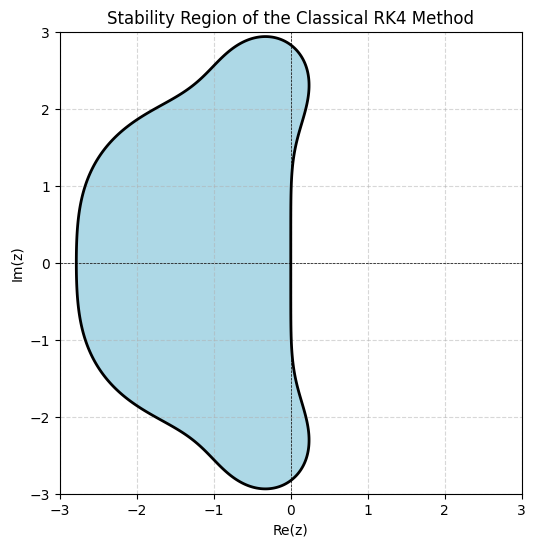

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rk4_stability_function(z):
    """Compute the stability function for RK4."""
    return 1 + z + 0.5*z**2 + (1/6)*z**3 + (1/24)*z**4

# Generate a grid of complex numbers z = x + iy
x = np.linspace(-3, 3, 500)
y = np.linspace(-3, 3, 500)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Compute the magnitude of the stability function
R = np.abs(rk4_stability_function(Z))

# Plot the stability region (where |R(z)| ≤ 1)
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, R, levels=[0, 1], colors=['lightblue'])
plt.contour(X, Y, R, levels=[1], colors='k', linewidths=2)
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)
plt.title('Stability Region of the Classical RK4 Method')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_aspect('equal')
plt.show()

## Stability plot

## Prey-predator fixed step

In [2]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

f, _ = prey_predator_model(a, b)


# Solve using Explicit Euler with fixed step size
N = 1000
h = (t_span[1] - t_span[0]) / N

# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))


solver = rk4()

solution_fixed_t, solution_fixed_x = ExplicitRungeKuttaSolverAdaptive(f, t_span, x0, h0, solver, abs_tol, rel_tol)


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, solution_ode45.y[0], label='ODE45 Prey', color='blue')
plt.plot(solution_ode45.t, solution_ode45.y[1], label='ODE45 Predator', color='orange')
plt.plot(solution_fixed_t, solution_fixed_x[:,0], label='Fixed Step Prey', linestyle='--', color='blue')
plt.plot(solution_fixed_t, solution_fixed_x[:,1], label='Fixed Step Predator', linestyle='--', color='orange')
plt.title('Prey-Predator Model Solutions with step size = 0.1')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


NameError: name 'h0' is not defined

/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/TestProblems.py:8: RuntimeWarning: overflow encountered in scalar multiply
  dxdt = alpha * x - beta * x * y
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/TestProblems.py:9: RuntimeWarning: overflow encountered in scalar multiply
  dydt = beta * x * y - alpha * y


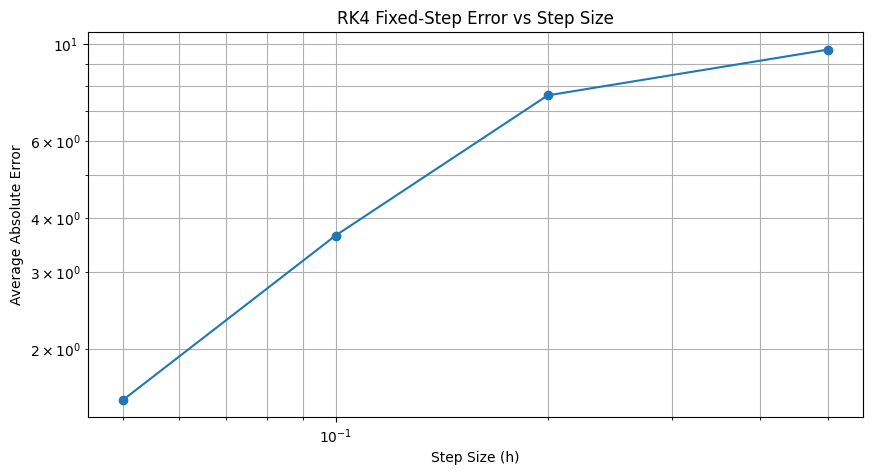

In [3]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Prey, Predator

# Define the model
f, _ = prey_predator_model(0.2,0.04)

# Test different fixed step sizes
N_values = np.array([50, 100, 200, 500, 1000, 2000])
h_values = (t_span[1] - t_span[0]) / N_values
errors = []

for idx, N in enumerate(N_values):
    # Solve with your fixed-step RK4
    t_fixed, x_fixed = ExplicitRungeKuttaSolver(f, t_span, x0, h_values[idx], solver)


    # Solve with scipy's RK45 (reference solution)
    solution_ode45 = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
    # Interpolate prey and predator separately
    prey_interp = np.interp(solution_ode45.t, t_fixed[:,0], x_fixed[:, 0])  # Prey
    predator_interp = np.interp(solution_ode45.t, t_fixed[:,0], x_fixed[:, 1])  # Predator
    
    # Compute error (L1 norm)
    error = np.mean(np.abs(prey_interp - solution_ode45.y[0]) + 
                   np.abs(predator_interp - solution_ode45.y[1]))
    errors.append(error)

# Plot error vs step size
plt.figure(figsize=(10, 5))
plt.loglog(h_values, errors, 'o-')
plt.xlabel('Step Size (h)')
plt.ylabel('Average Absolute Error')
plt.title('RK4 Fixed-Step Error vs Step Size')
plt.grid(True, which="both", ls="-")
plt.show()

In [4]:
x_fixed

array([[20.        ,  9.        ],
       [19.84      ,  9.27      ],
       [19.6705664 ,  9.5451336 ],
       ...,
       [ 0.2431427 ,  2.89927108],
       [ 0.24416425,  2.87168824],
       [ 0.24520356,  2.84437369]])

## Prey-predator adaptive time step

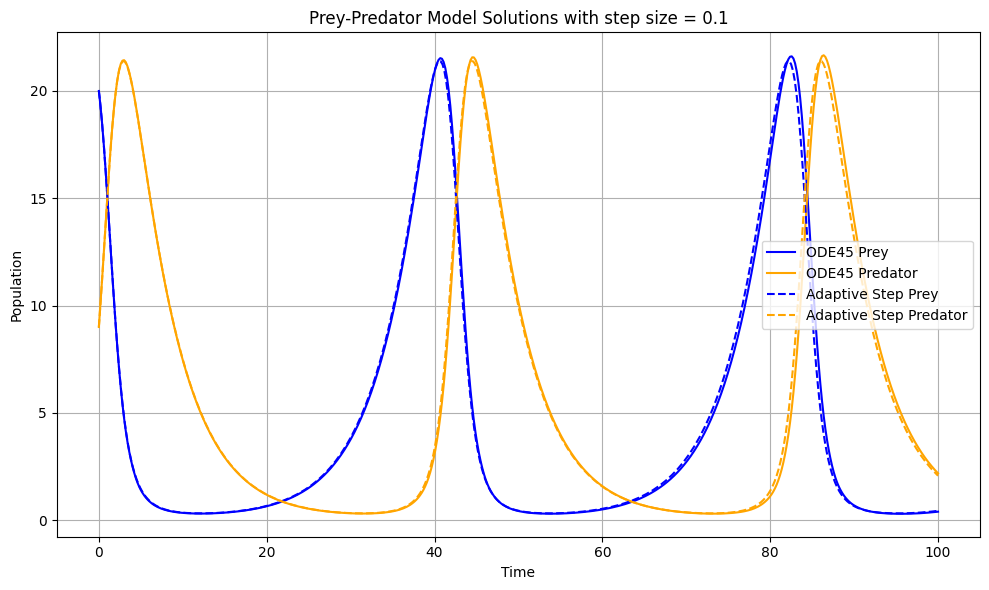

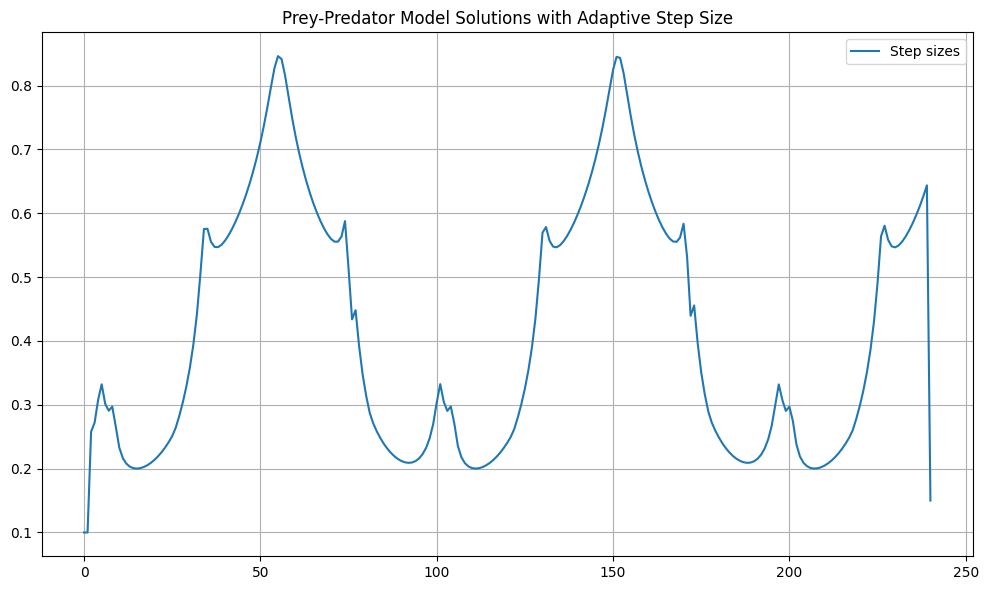

In [ ]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

f, _ = prey_predator_model(a, b)

N = 1000
h0 = (t_span[1] - t_span[0]) / N

# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))

# Solve using Explicit Euler with fixed step size


solver = rk4()

abs_tol = 1e-6
rel_tol = 1e-6

solution_adaptive_t, solution_adaptive_x, solution_adaptive_h = ExplicitRungeKuttaSolverAdaptive(f, t_span, x0, h0, solver, abs_tol, rel_tol)


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, solution_ode45.y[0], label='ODE45 Prey', color='blue')
plt.plot(solution_ode45.t, solution_ode45.y[1], label='ODE45 Predator', color='orange')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,0], label='Adaptive Step Prey', linestyle='--', color='blue')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,1], label='Adaptive Step Predator', linestyle='--', color='orange')
plt.title('Prey-Predator Model Solutions with step size = 0.1')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#Plot the stepsizes in solution_adaptive_h
plt.figure(figsize=(10, 6))
plt.plot(solution_adaptive_h, label = 'Step sizes')
plt.title('Prey-Predator Model Solutions with Adaptive Step Size')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


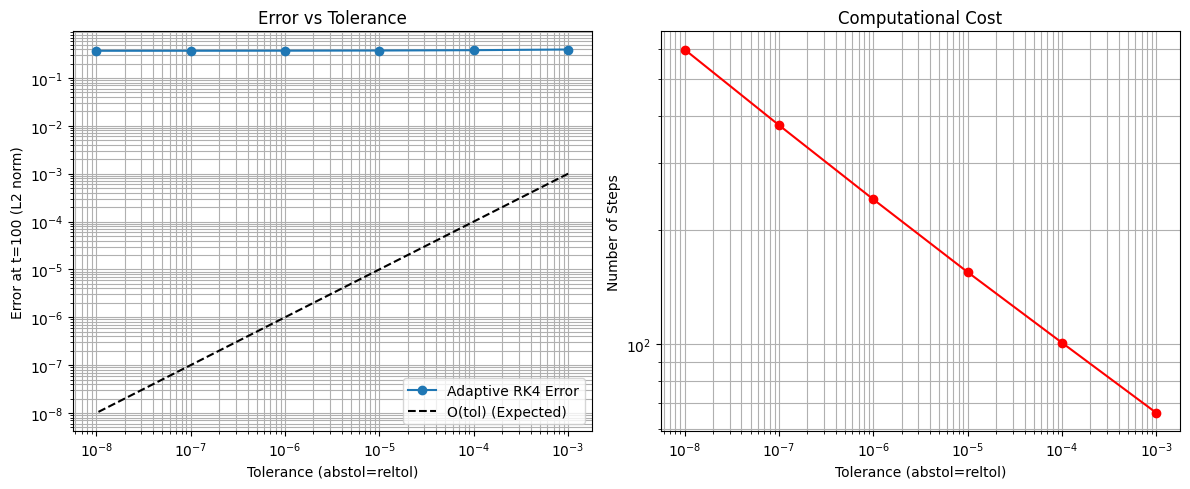

In [ ]:
a, b = 0.2, 0.04
t_span = (0, 100)
x0 = np.array([20, 9])

# High-accuracy reference solution (ODE45 at t=100)
f, _ = prey_predator_model(a, b)

# Solve using Explicit Euler with fixed step size
N = 1000
h0 = (t_span[1] - t_span[0]) / N

# Test different tolerances
tolerances = np.logspace(-3, -8, 6)  # [1e-3, 1e-4, ..., 1e-8]
errors = []
steps_taken = []


for tol in tolerances:
    ref_sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
    # Run adaptive RK4 with current tolerance
    t_adaptive, x_adaptive, h_adaptive = ExplicitRungeKuttaSolverAdaptive(
        f, t_span, x0, h0=h0, solver=solver, 
        abstol=tol, reltol=tol
    )
    
    # Interpolate prey and predator separately
    prey_interp = np.interp(ref_sol.t, t_adaptive, x_adaptive[:, 0])  # Prey
    predator_interp = np.interp(ref_sol.t, t_adaptive, x_adaptive[:, 1])  # Predator
    
    # Compute error (L1 norm)
    error = np.mean(np.abs(prey_interp - ref_sol.y[0]) + 
                   np.abs(predator_interp - ref_sol.y[1]))
    errors.append(error)

    steps_taken.append(len(t_adaptive))

# Plot error vs tolerance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.loglog(tolerances, errors, 'o-', label='Adaptive RK4 Error')
plt.loglog(tolerances, tolerances, 'k--', label='O(tol) (Expected)')
plt.xlabel('Tolerance (abstol=reltol)')
plt.ylabel('Error')
plt.title('Error vs Tolerance')
plt.legend()
plt.grid(True, which="both", ls="-")

# Plot steps taken vs tolerance
plt.subplot(1, 2, 2)
plt.loglog(tolerances, steps_taken, 'o-', color='red')
plt.xlabel('Tolerance (abstol=reltol)')
plt.ylabel('Number of Steps')
plt.title('Computational Cost')
plt.grid(True, which="both", ls="-")
plt.tight_layout()
plt.show()

## Van der Pol fixed time step

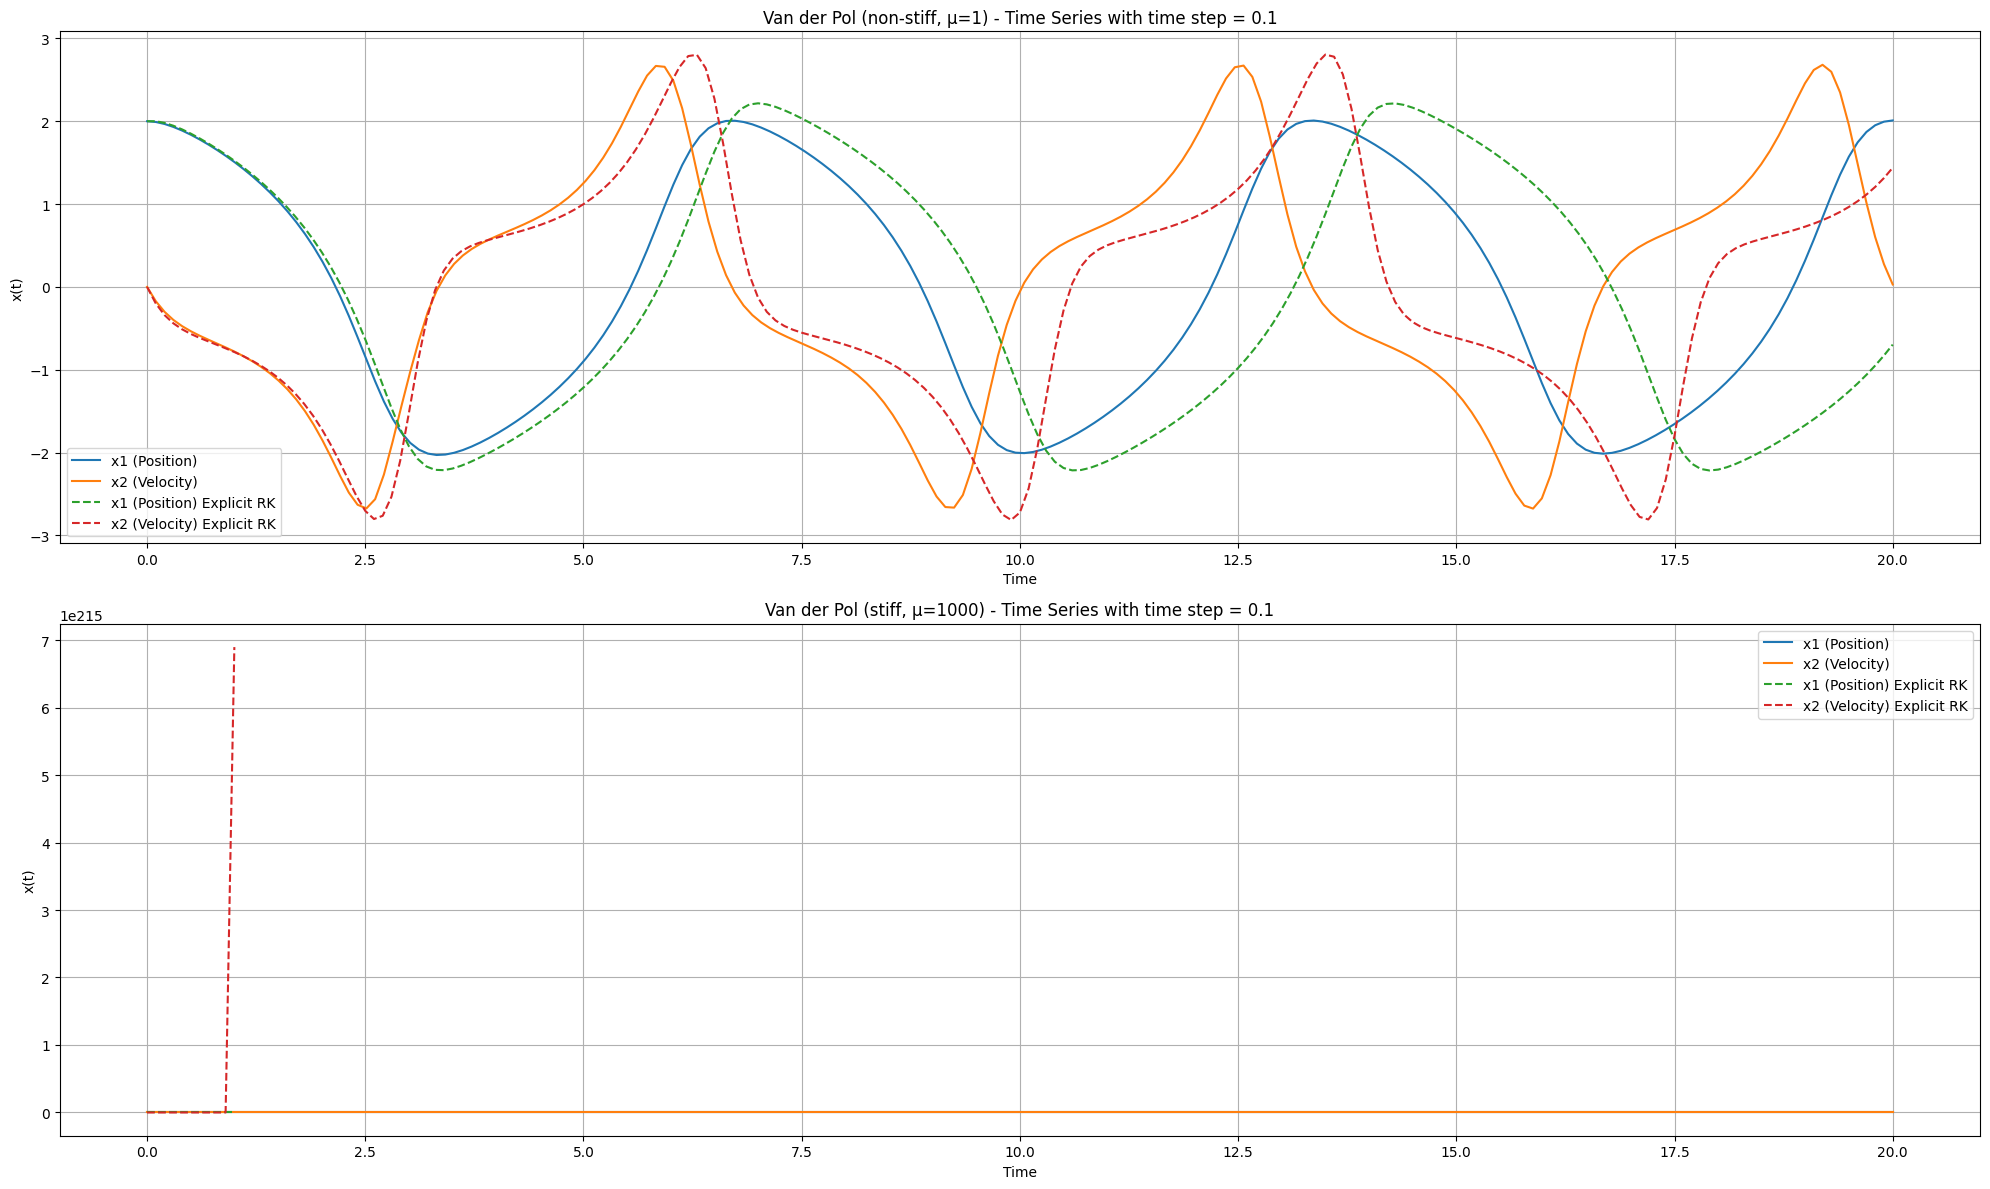

In [51]:
# Define time span and initial conditions
mu_nonstiff = 1  # Non-stiff
mu_stiff = 100  # Stiff
t_span = (0, 20)
x0 = np.array([2, 0])  # Initial condition

f_stiff, _ = van_der_pol_model(mu_stiff)
f_nonstiff, _ = van_der_pol_model(mu_nonstiff)


#Solver parameters
N = 200
h = (t_span[1] - t_span[0]) / N

solver = rk4()

# Solve using ode45 (method='RK45')
sol_nonstiff = solve_ivp(f_nonstiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_nonstiff_t, solution_fixed_nonstiff_x = ExplicitRungeKuttaSolver(f_nonstiff, t_span, x0, h, solver)


sol_stiff = solve_ivp(f_stiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_stiff_t, solution_fixed_stiff_x = ExplicitRungeKuttaSolver(f_stiff, t_span, x0, h, solver)


#Plot two plots one for the non-stiff solutions and one for the stiff-solutions
plt.figure(figsize=(20,12))

# Plot time series for non-stiff
plt.subplot(2, 1, 1)
plt.plot(sol_nonstiff.t, sol_nonstiff.y[0], label='x1 (Position)')
plt.plot(sol_nonstiff.t, sol_nonstiff.y[1], label='x2 (Velocity)')
plt.plot(solution_fixed_nonstiff_t, solution_fixed_nonstiff_x[:,0], '--', label = 'x1 (Position) Explicit RK')
plt.plot(solution_fixed_nonstiff_t, solution_fixed_nonstiff_x[:,1], '--', label = 'x2 (Velocity) Explicit RK')
plt.legend()
plt.title('Van der Pol (non-stiff, μ=1) - Time Series with time step = 0.1')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid()
plt.tight_layout()

# Plot time series for stiff
plt.subplot(2, 1, 2)
plt.plot(sol_stiff.t, sol_stiff.y[0], label = 'x1 (Position)')
plt.plot(sol_stiff.t, sol_stiff.y[1], label = 'x2 (Velocity)')
plt.plot(solution_fixed_stiff_t, solution_fixed_stiff_x[:,0], '--', label = 'x1 (Position) Explicit RK')
plt.plot(solution_fixed_stiff_t, solution_fixed_stiff_x[:,1], '--', label = 'x2 (Velocity) Explicit RK')
plt.legend()
plt.title('Van der Pol (stiff, μ=1000) - Time Series with time step = 0.1')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid()
plt.tight_layout()

/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/TestProblems.py:35: RuntimeWarning: overflow encountered in scalar multiply
  dydt = mu * (1 - x**2) * y - x


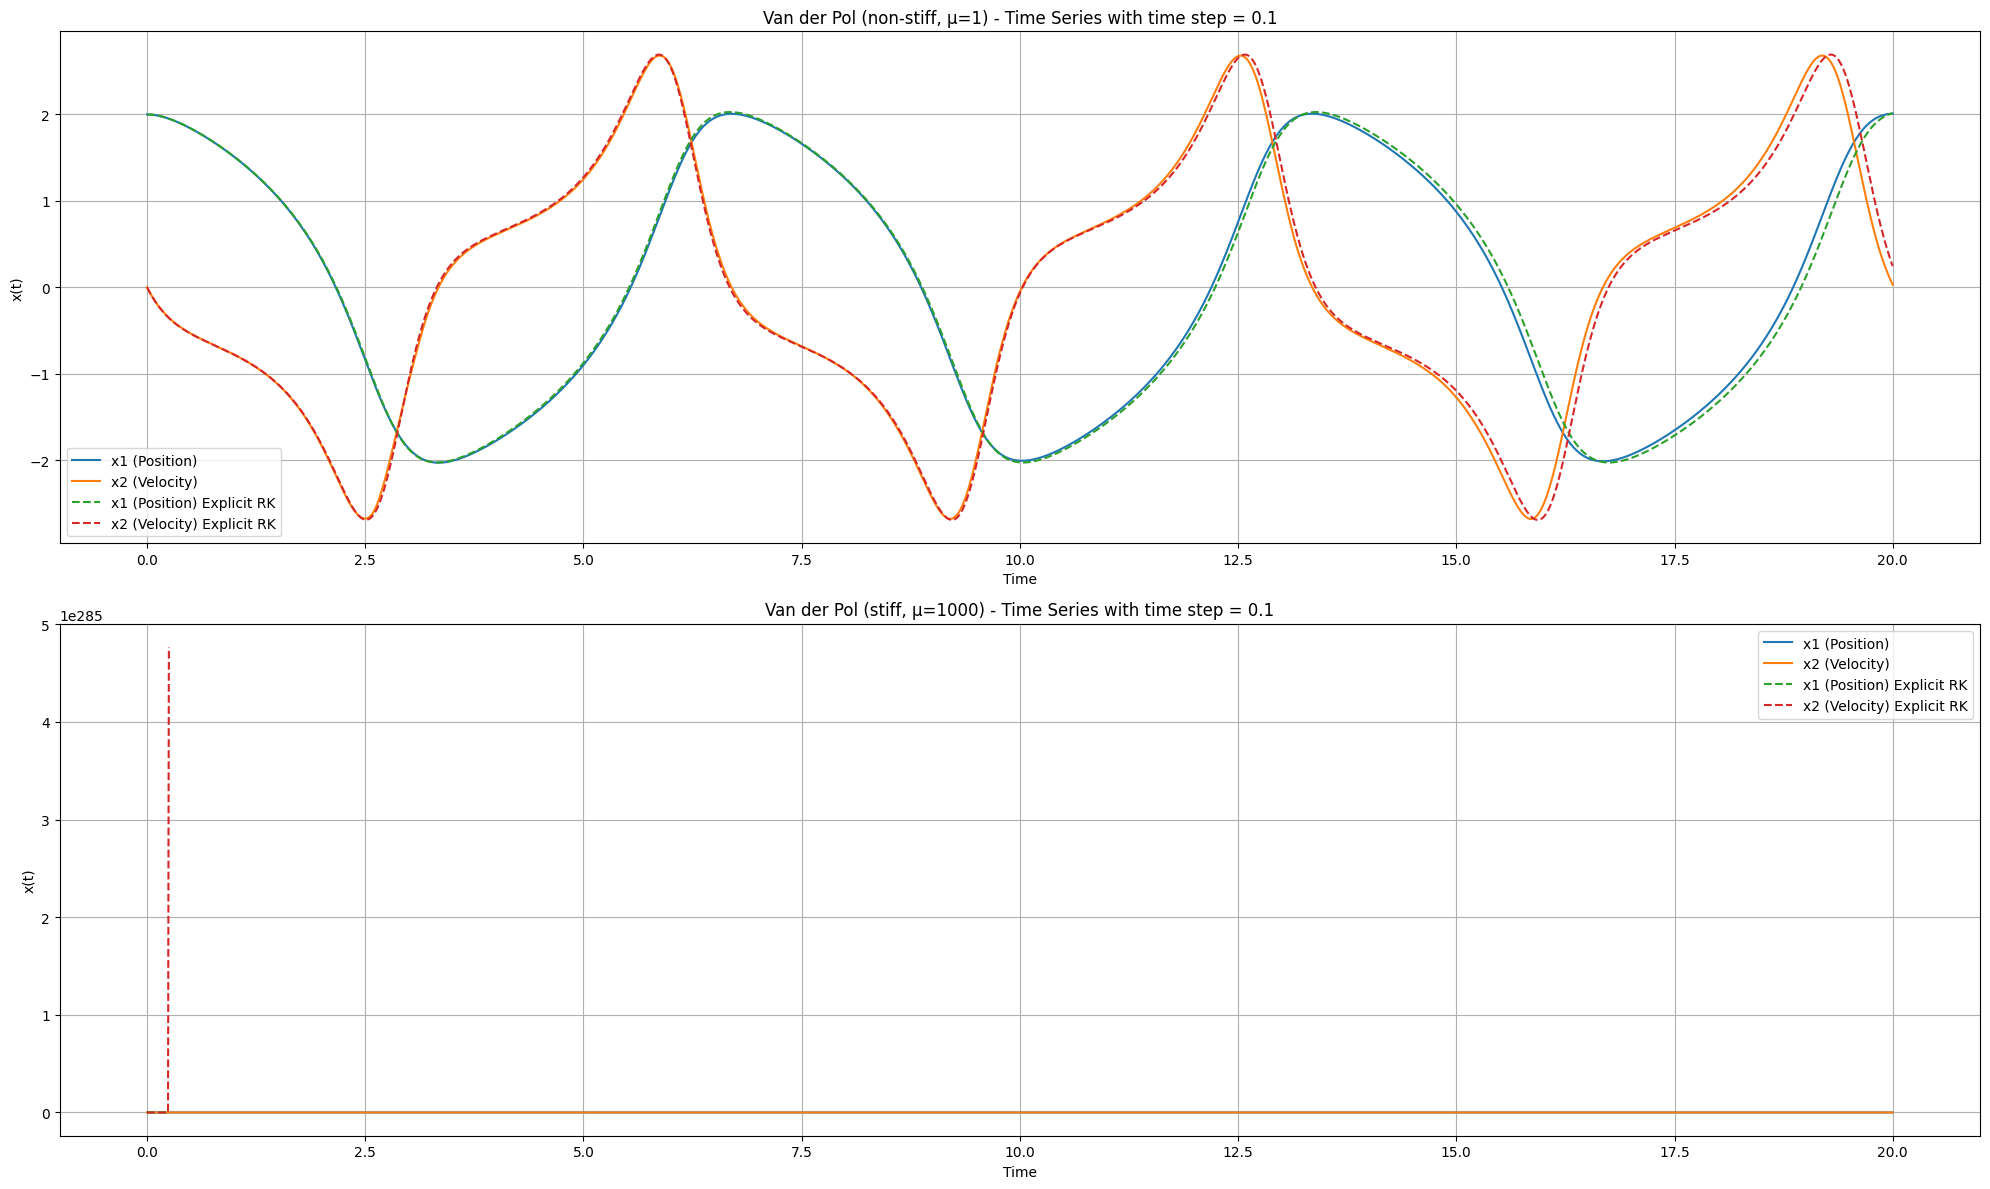

In [ ]:
# Define time span and initial conditions
mu_nonstiff = 1  # Non-stiff
mu_stiff = 100  # Stiff
t_span = (0, 20)
x0 = np.array([2, 0])  # Initial condition

f_stiff, _ = van_der_pol_model(mu_stiff)
f_nonstiff, _ = van_der_pol_model(mu_nonstiff)


#Solver parameters
N = 2000
h = (t_span[1] - t_span[0]) / N

solver = rk4()

# Solve using ode45 (method='RK45')
sol_nonstiff = solve_ivp(f_nonstiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_nonstiff_t, solution_fixed_nonstiff_x = ExplicitRungeKuttaSolver(f_nonstiff, t_span, x0, h, solver)


sol_stiff = solve_ivp(f_stiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_stiff_t, solution_fixed_stiff_x = ExplicitRungeKuttaSolver(f_stiff, t_span, x0, h, solver)


#Plot two plots one for the non-stiff solutions and one for the stiff-solutions
plt.figure(figsize=(20,12))

# Plot time series for non-stiff
plt.subplot(2, 1, 1)
plt.plot(sol_nonstiff.t, sol_nonstiff.y[0], label='x1 (Position)')
plt.plot(sol_nonstiff.t, sol_nonstiff.y[1], label='x2 (Velocity)')
plt.plot(solution_fixed_nonstiff_t, solution_fixed_nonstiff_x[:,0], '--', label = 'x1 (Position) Explicit RK')
plt.plot(solution_fixed_nonstiff_t, solution_fixed_nonstiff_x[:,1], '--', label = 'x2 (Velocity) Explicit RK')
plt.legend()
plt.title('Van der Pol (non-stiff, μ=1) - Time Series with time step = 0.01')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid()
plt.tight_layout()

# Plot time series for stiff
plt.subplot(2, 1, 2)
plt.plot(sol_stiff.t, sol_stiff.y[0], label = 'x1 (Position)')
plt.plot(sol_stiff.t, sol_stiff.y[1], label = 'x2 (Velocity)')
plt.plot(solution_fixed_stiff_t, solution_fixed_stiff_x[:,0], '--', label = 'x1 (Position) Explicit RK')
plt.plot(solution_fixed_stiff_t, solution_fixed_stiff_x[:,1], '--', label = 'x2 (Velocity) Explicit RK')
plt.legend()
plt.title('Van der Pol (stiff, μ=1000) - Time Series with time step = 0.1')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid()
plt.tight_layout()

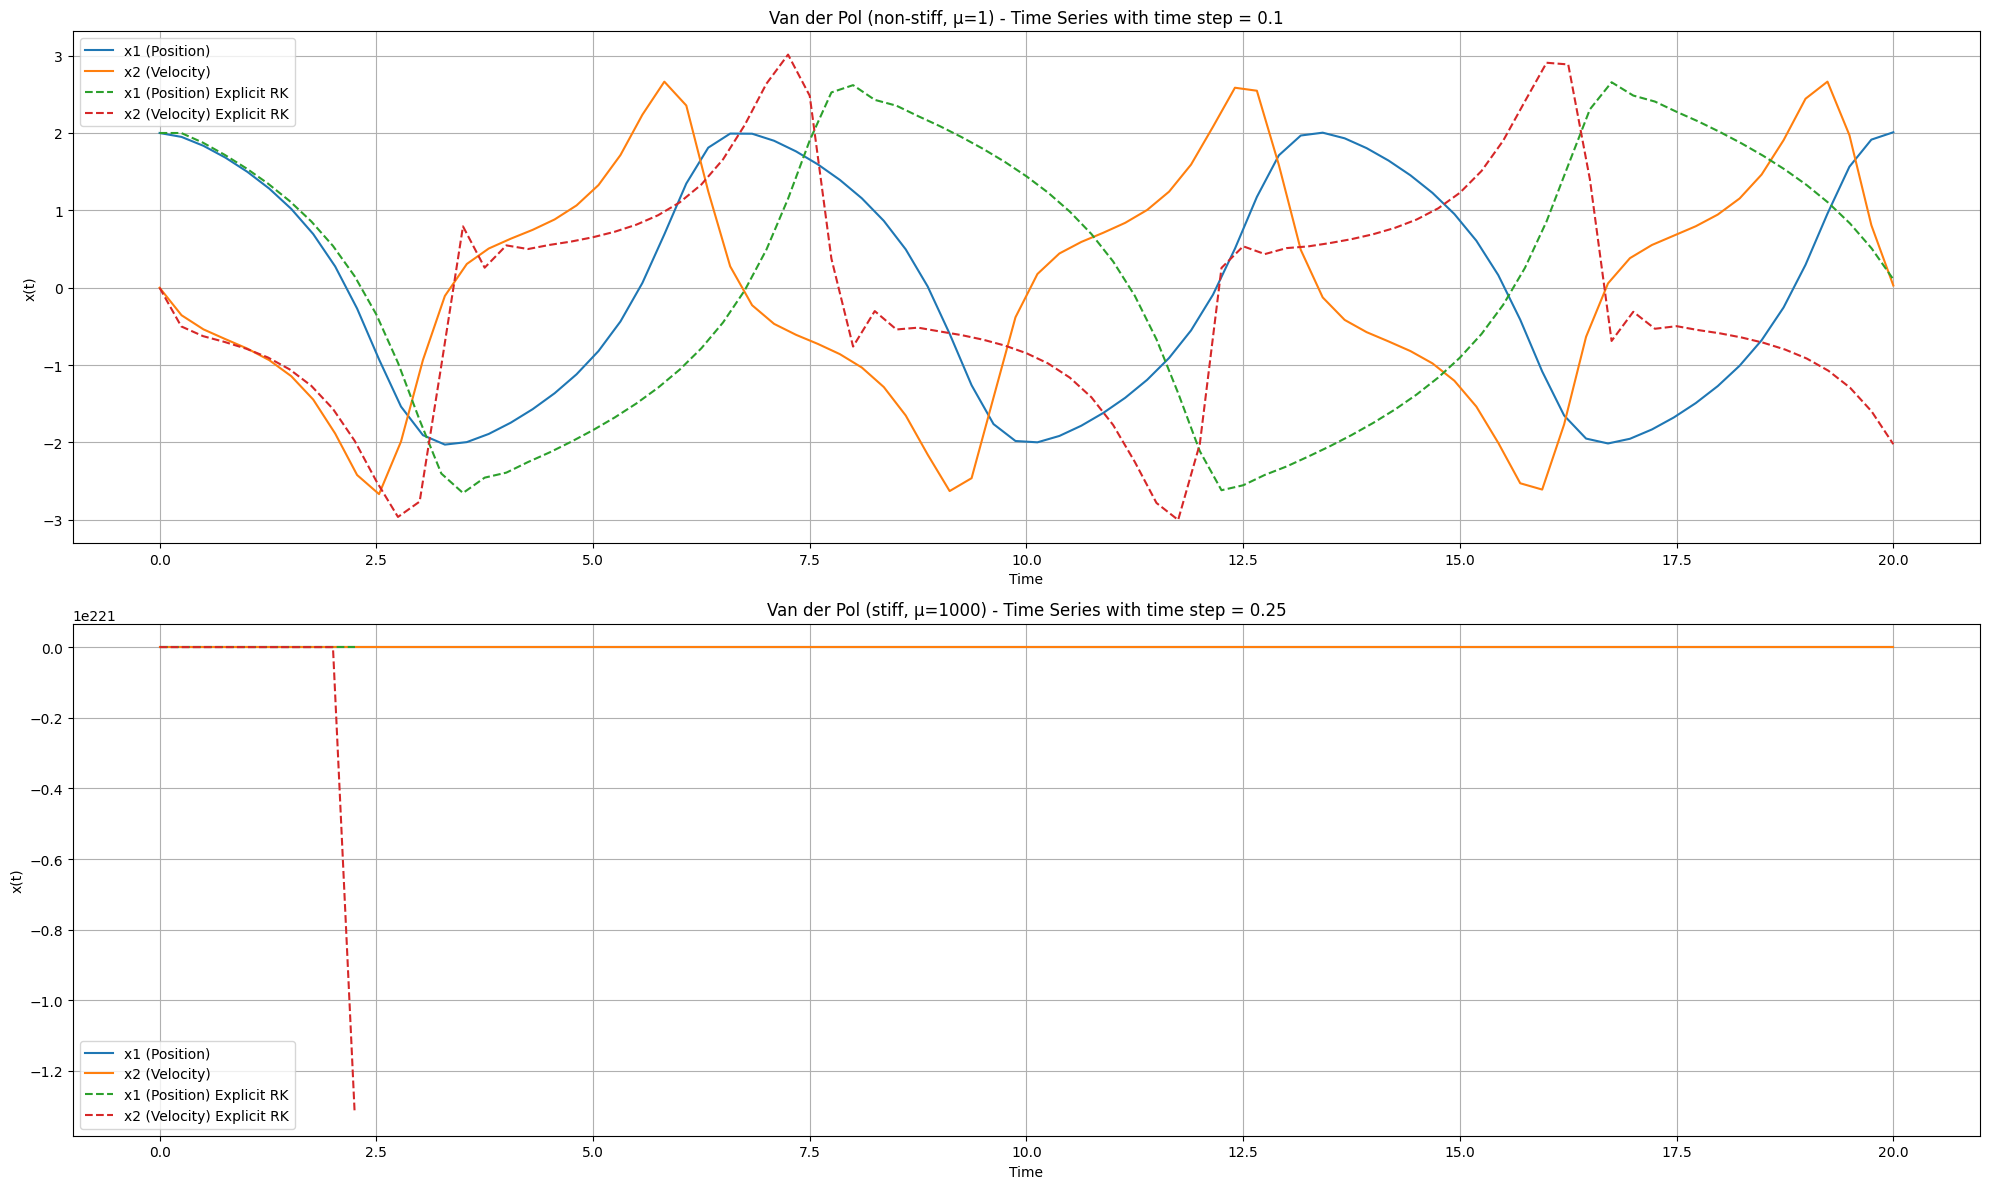

In [72]:
# Define time span and initial conditions
mu_nonstiff = 1  # Non-stiff
mu_stiff = 100  # Stiff
t_span = (0, 20)
x0 = np.array([2, 0])  # Initial condition

f_stiff, _ = van_der_pol_model(mu_stiff)
f_nonstiff, _ = van_der_pol_model(mu_nonstiff)


#Solver parameters
N = 80
h = (t_span[1] - t_span[0]) / N

solver = rk4()

# Solve using ode45 (method='RK45')
sol_nonstiff = solve_ivp(f_nonstiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_nonstiff_t, solution_fixed_nonstiff_x = ExplicitRungeKuttaSolver(f_nonstiff, t_span, x0, h, solver)


sol_stiff = solve_ivp(f_stiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_stiff_t, solution_fixed_stiff_x = ExplicitRungeKuttaSolver(f_stiff, t_span, x0, h, solver)


#Plot two plots one for the non-stiff solutions and one for the stiff-solutions
plt.figure(figsize=(20,12))

# Plot time series for non-stiff
plt.subplot(2, 1, 1)
plt.plot(sol_nonstiff.t, sol_nonstiff.y[0], label='x1 (Position)')
plt.plot(sol_nonstiff.t, sol_nonstiff.y[1], label='x2 (Velocity)')
plt.plot(solution_fixed_nonstiff_t, solution_fixed_nonstiff_x[:,0], '--', label = 'x1 (Position) Explicit RK')
plt.plot(solution_fixed_nonstiff_t, solution_fixed_nonstiff_x[:,1], '--', label = 'x2 (Velocity) Explicit RK')
plt.legend()
plt.title('Van der Pol (non-stiff, μ=1) - Time Series with time step = 0.1')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid()
plt.tight_layout()

# Plot time series for stiff
plt.subplot(2, 1, 2)
plt.plot(sol_stiff.t, sol_stiff.y[0], label = 'x1 (Position)')
plt.plot(sol_stiff.t, sol_stiff.y[1], label = 'x2 (Velocity)')
plt.plot(solution_fixed_stiff_t, solution_fixed_stiff_x[:,0], '--', label = 'x1 (Position) Explicit RK')
plt.plot(solution_fixed_stiff_t, solution_fixed_stiff_x[:,1], '--', label = 'x2 (Velocity) Explicit RK')
plt.legend()
plt.title('Van der Pol (stiff, μ=1000) - Time Series with time step = 0.25')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid()
plt.tight_layout()

## Van der Pol adaptive time step

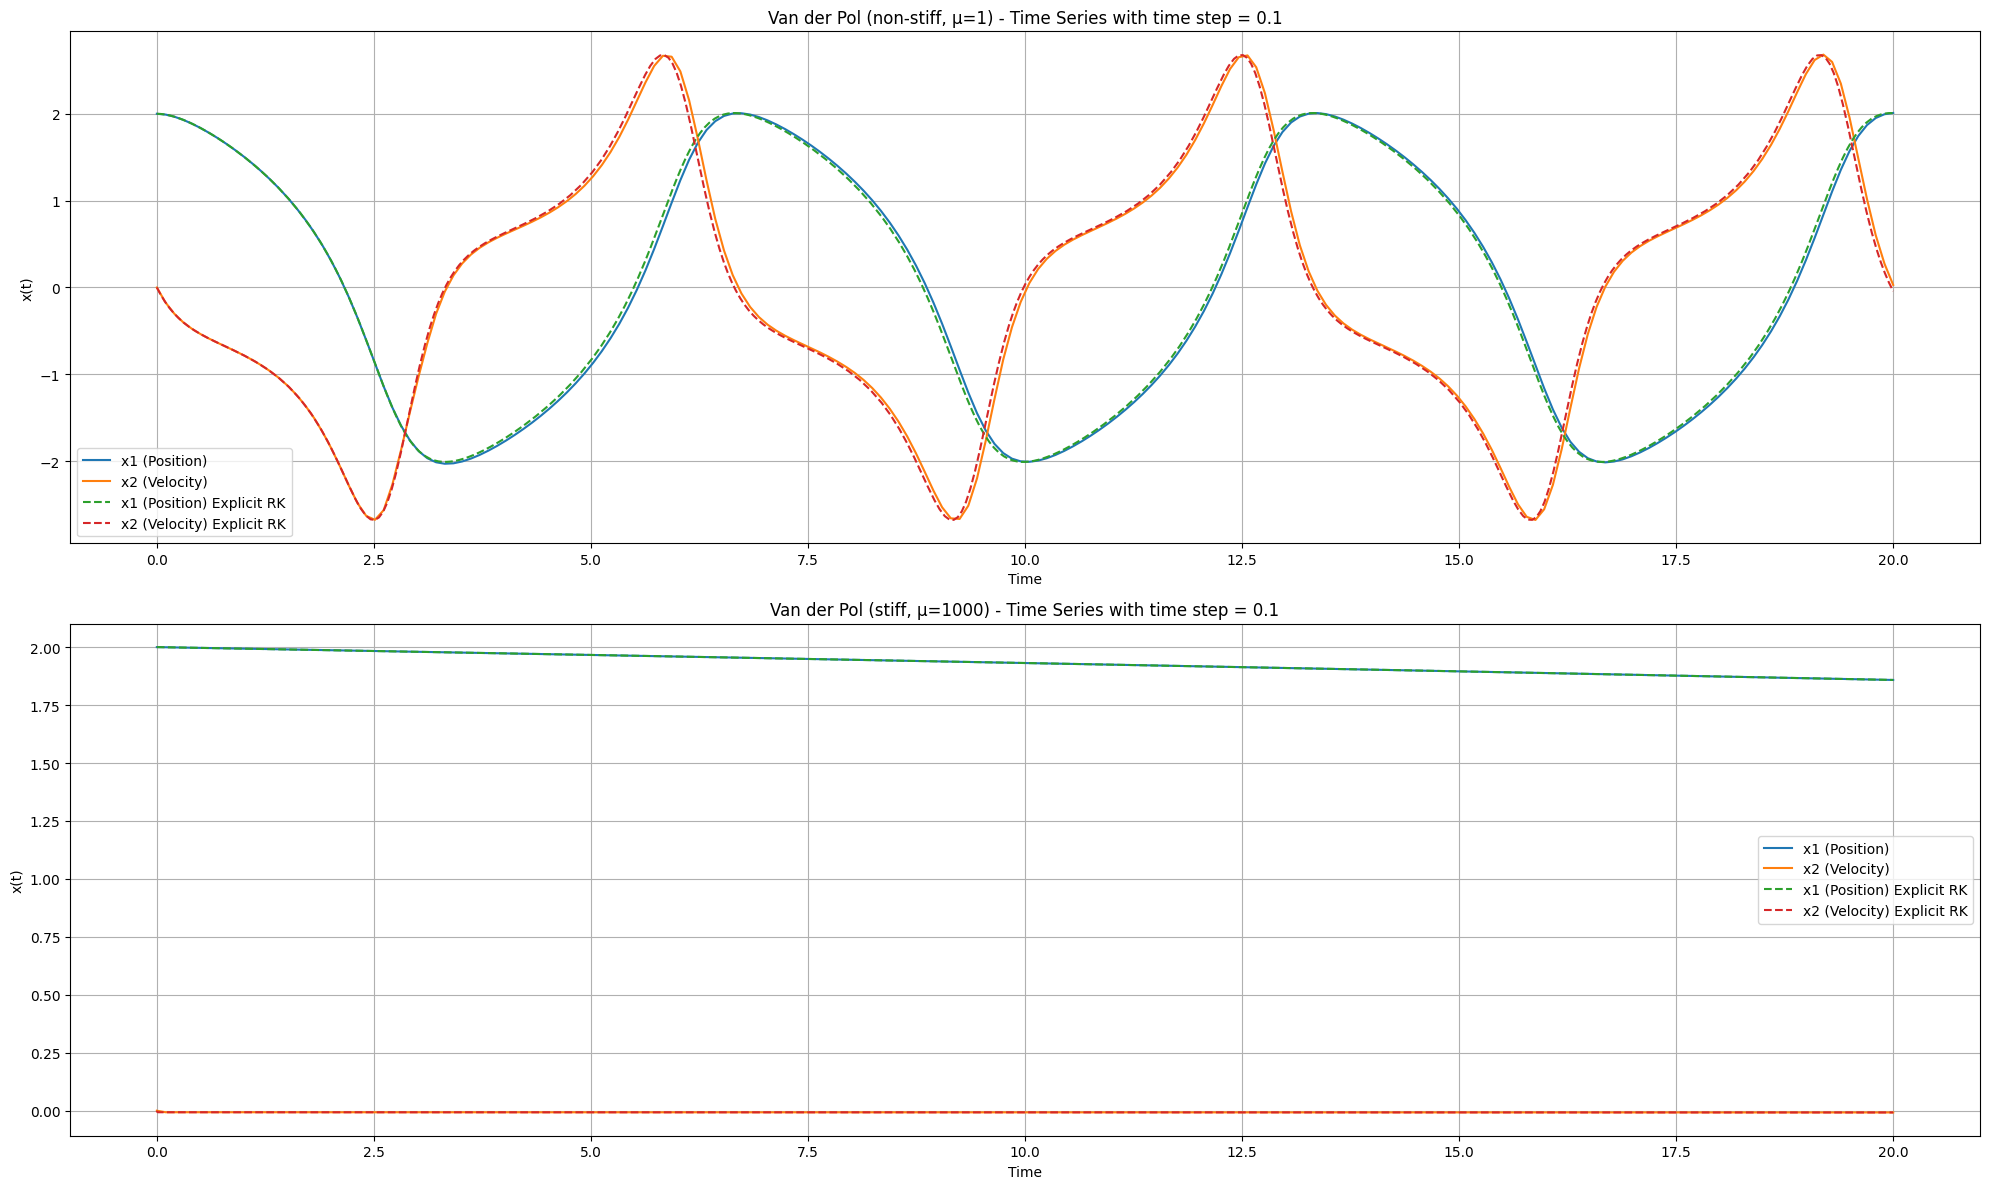

In [54]:
# Define time span and initial conditions
mu_nonstiff = 1  # Non-stiff
mu_stiff = 100  # Stiff
t_span = (0, 20)
x0 = np.array([2, 0])  # Initial condition

f_stiff, _ = van_der_pol_model(mu_stiff)
f_nonstiff, _ = van_der_pol_model(mu_nonstiff)


#Solver parameters
N = 200
h0 = (t_span[1] - t_span[0]) / N

solver = rk4()

abs_tol = 1e-6
rel_tol = 1e-6

# Solve using ode45 (method='RK45')
sol_nonstiff = solve_ivp(f_nonstiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_nonstiff_t, solution_fixed_nonstiff_x, solution_fixed_nonstiff_h = ExplicitRungeKuttaSolverAdaptive(f_nonstiff, t_span, x0, h0, solver, abs_tol, rel_tol)

sol_stiff = solve_ivp(f_stiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_stiff_t, solution_fixed_stiff_x, solution_fixed_stiff_h = ExplicitRungeKuttaSolverAdaptive(f_stiff, t_span, x0, h0, solver, abs_tol, rel_tol)


#Plot two plots one for the non-stiff solutions and one for the stiff-solutions
plt.figure(figsize=(20,12))

# Plot time series for non-stiff
plt.subplot(2, 1, 1)
plt.plot(sol_nonstiff.t, sol_nonstiff.y[0], label='x1 (Position)')
plt.plot(sol_nonstiff.t, sol_nonstiff.y[1], label='x2 (Velocity)')
plt.plot(solution_fixed_nonstiff_t, solution_fixed_nonstiff_x[:,0], '--', label = 'x1 (Position) Explicit RK')
plt.plot(solution_fixed_nonstiff_t, solution_fixed_nonstiff_x[:,1], '--', label = 'x2 (Velocity) Explicit RK')
plt.legend()
plt.title('Van der Pol (non-stiff, μ=1) - Time Series with time step = 0.1')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid()
plt.tight_layout()

# Plot time series for stiff
plt.subplot(2, 1, 2)
plt.plot(sol_stiff.t, sol_stiff.y[0], label = 'x1 (Position)')
plt.plot(sol_stiff.t, sol_stiff.y[1], label = 'x2 (Velocity)')
plt.plot(solution_fixed_stiff_t, solution_fixed_stiff_x[:,0], '--', label = 'x1 (Position) Explicit RK')
plt.plot(solution_fixed_stiff_t, solution_fixed_stiff_x[:,1], '--', label = 'x2 (Velocity) Explicit RK')
plt.legend()
plt.title('Van der Pol (stiff, μ=1000) - Time Series with time step = 0.1')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid()
plt.tight_layout()

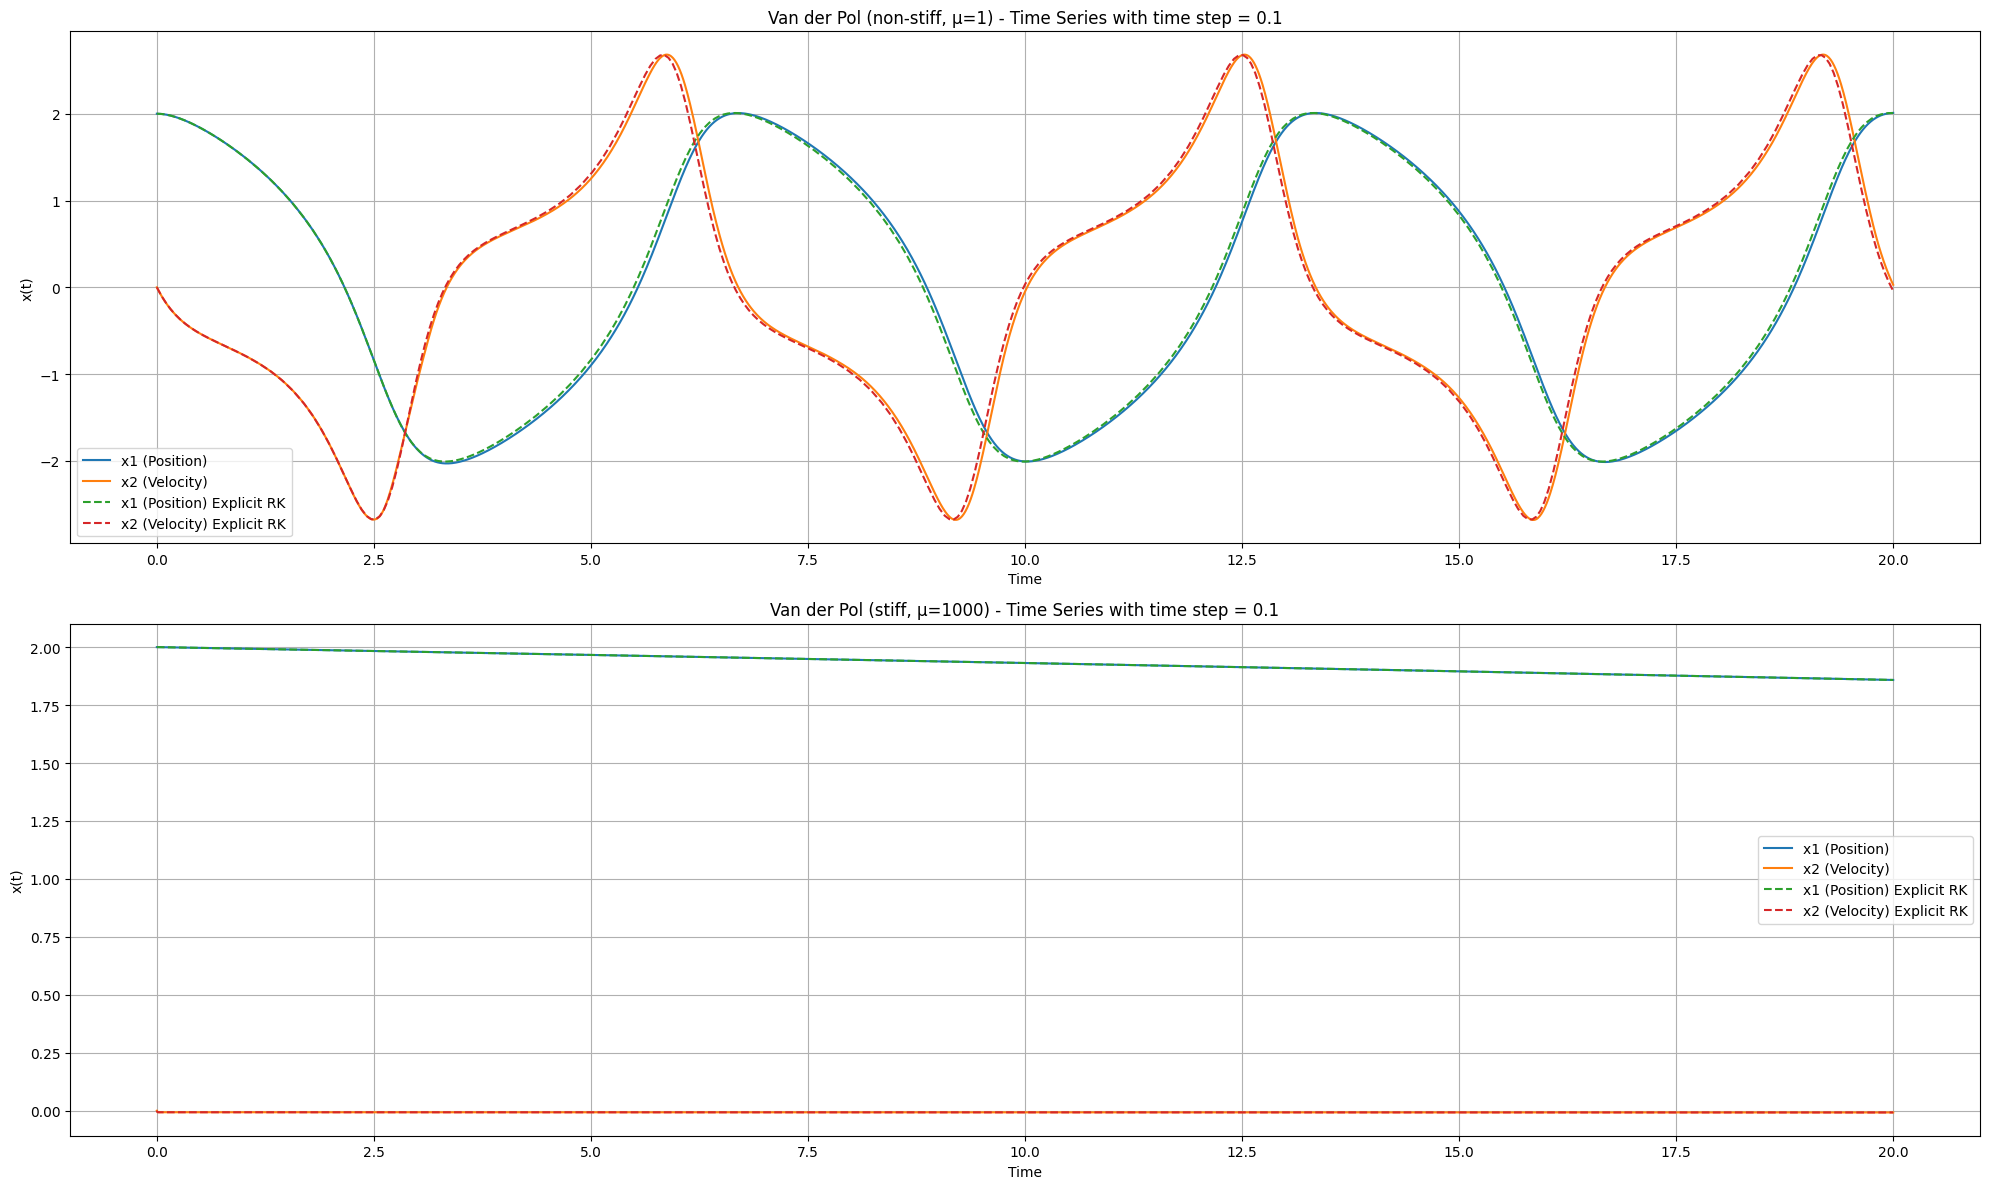

In [61]:
# Define time span and initial conditions
mu_nonstiff = 1  # Non-stiff
mu_stiff = 100  # Stiff
t_span = (0, 20)
x0 = np.array([2, 0])  # Initial condition

f_stiff, _ = van_der_pol_model(mu_stiff)
f_nonstiff, _ = van_der_pol_model(mu_nonstiff)


#Solver parameters
N = 2000
h0 = (t_span[1] - t_span[0]) / N

solver = rk4()

abs_tol = 1e-6
rel_tol = 1e-6

# Solve using ode45 (method='RK45')
sol_nonstiff = solve_ivp(f_nonstiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_nonstiff_t, solution_fixed_nonstiff_x, solution_fixed_nonstiff_h = ExplicitRungeKuttaSolverAdaptive(f_nonstiff, t_span, x0, h0, solver, abs_tol, rel_tol)

sol_stiff = solve_ivp(f_stiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_stiff_t, solution_fixed_stiff_x, solution_fixed_stiff_h = ExplicitRungeKuttaSolverAdaptive(f_stiff, t_span, x0, h0, solver, abs_tol, rel_tol)


#Plot two plots one for the non-stiff solutions and one for the stiff-solutions
plt.figure(figsize=(20,12))

# Plot time series for non-stiff
plt.subplot(2, 1, 1)
plt.plot(sol_nonstiff.t, sol_nonstiff.y[0], label='x1 (Position)')
plt.plot(sol_nonstiff.t, sol_nonstiff.y[1], label='x2 (Velocity)')
plt.plot(solution_fixed_nonstiff_t, solution_fixed_nonstiff_x[:,0], '--', label = 'x1 (Position) Explicit RK')
plt.plot(solution_fixed_nonstiff_t, solution_fixed_nonstiff_x[:,1], '--', label = 'x2 (Velocity) Explicit RK')
plt.legend()
plt.title('Van der Pol (non-stiff, μ=1) - Time Series with time step = 0.1')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid()
plt.tight_layout()

# Plot time series for stiff
plt.subplot(2, 1, 2)
plt.plot(sol_stiff.t, sol_stiff.y[0], label = 'x1 (Position)')
plt.plot(sol_stiff.t, sol_stiff.y[1], label = 'x2 (Velocity)')
plt.plot(solution_fixed_stiff_t, solution_fixed_stiff_x[:,0], '--', label = 'x1 (Position) Explicit RK')
plt.plot(solution_fixed_stiff_t, solution_fixed_stiff_x[:,1], '--', label = 'x2 (Velocity) Explicit RK')
plt.legend()
plt.title('Van der Pol (stiff, μ=1000) - Time Series with time step = 0.1')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid()
plt.tight_layout()

## CSTR 3 state model fixed step size

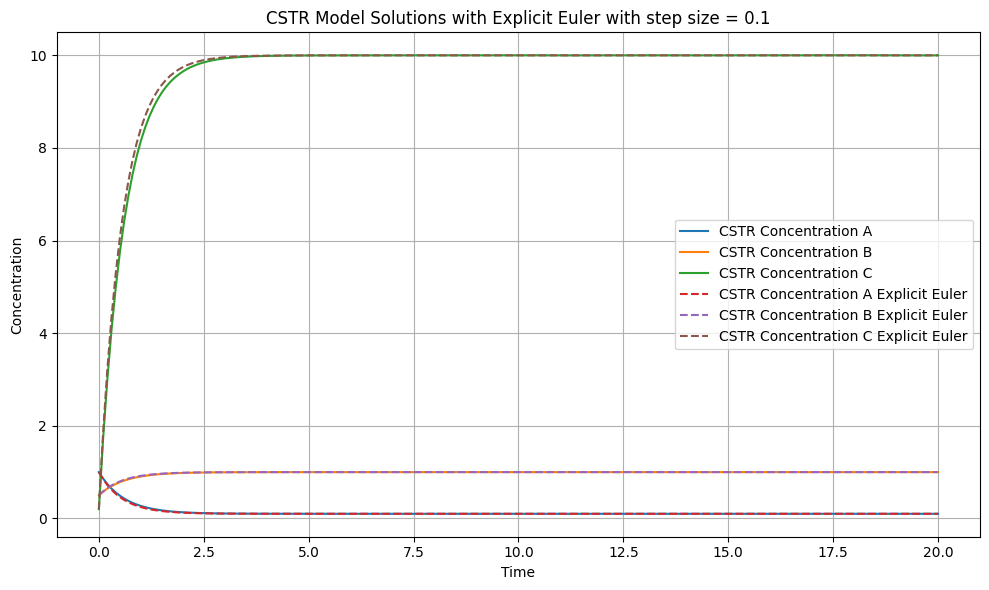

In [ ]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = np.array([1.0, 0.5, 0.2])  # Initial conditions for CSTR model

#Solver parameters
N = 200
h = (t_span[1] - t_span[0]) / N

f, _ = CSTR_3state_model(params)

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_t, solution_fixed_x = ExplicitRungeKuttaSolver(f, t_span, x0, h, solver)

#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='CSTR Concentration A')
plt.plot(sol.t, sol.y[1], label='CSTR Concentration B') 
plt.plot(sol.t, sol.y[2], label='CSTR Concentration C')
plt.plot(solution_fixed_t, solution_fixed_x[:,0], label='CSTR Concentration A Explicit Euler', linestyle='--')
plt.plot(solution_fixed_t, solution_fixed_x[:,1], label='CSTR Concentration B Explicit Euler', linestyle='--')
plt.plot(solution_fixed_t, solution_fixed_x[:,2], label='CSTR Concentration C Explicit Euler', linestyle='--')
plt.title('CSTR Model Solutions with Explicit Runge-Kutta with step size = 0.1')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

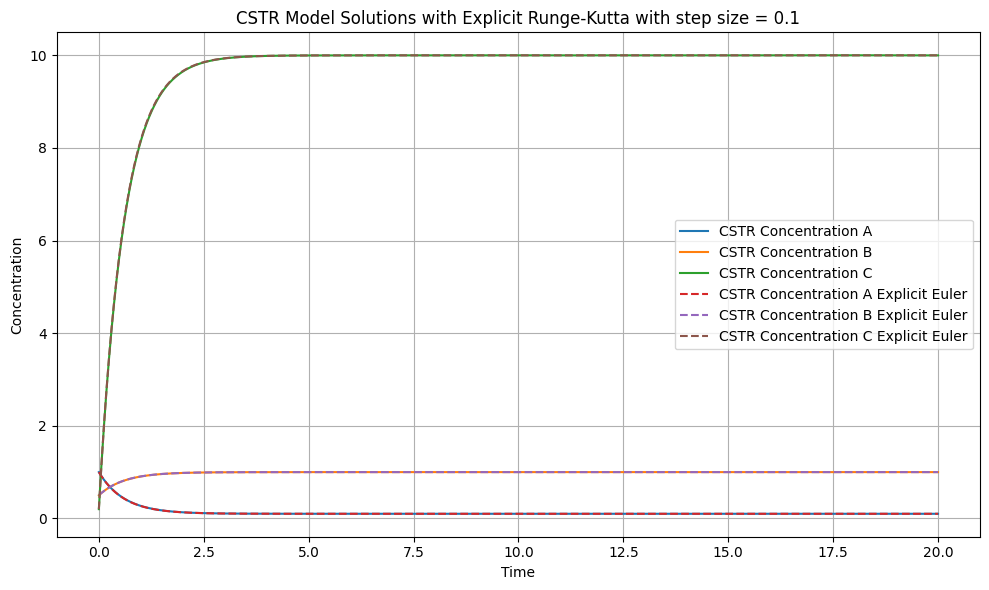

In [ ]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = np.array([1.0, 0.5, 0.2])  # Initial conditions for CSTR model

#Solver parameters
N = 2000
h = (t_span[1] - t_span[0]) / N

f, _ = CSTR_3state_model(params)

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_t, solution_fixed_x = ExplicitRungeKuttaSolver(f, t_span, x0, h, solver)

#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='CSTR Concentration A')
plt.plot(sol.t, sol.y[1], label='CSTR Concentration B') 
plt.plot(sol.t, sol.y[2], label='CSTR Concentration C')
plt.plot(solution_fixed_t, solution_fixed_x[:,0], label='CSTR Concentration A Explicit Euler', linestyle='--')
plt.plot(solution_fixed_t, solution_fixed_x[:,1], label='CSTR Concentration B Explicit Euler', linestyle='--')
plt.plot(solution_fixed_t, solution_fixed_x[:,2], label='CSTR Concentration C Explicit Euler', linestyle='--')
plt.title('CSTR Model Solutions with Explicit Runge-Kutta with step size = 0.01')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

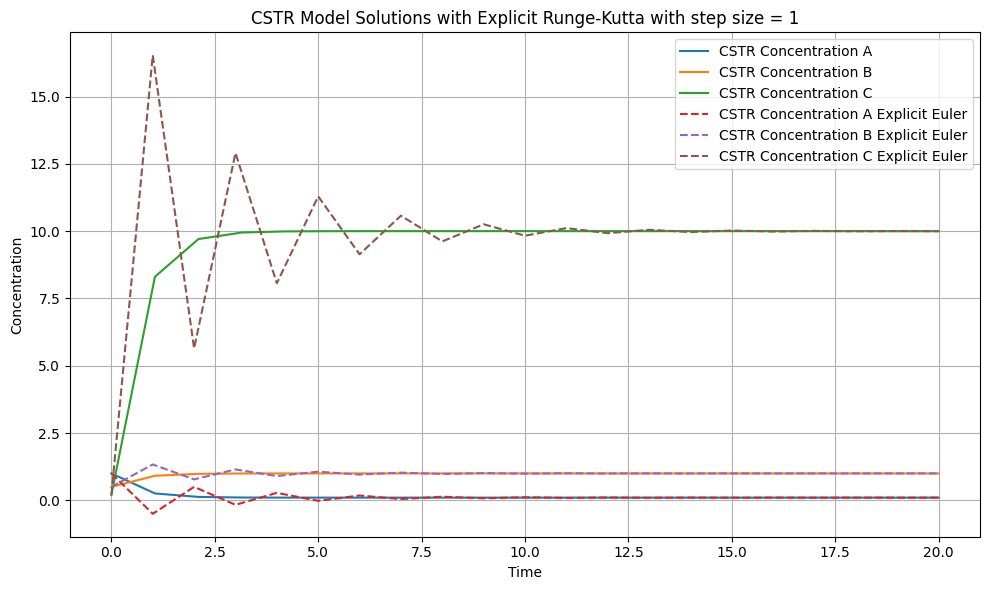

In [76]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = np.array([1.0, 0.5, 0.2])  # Initial conditions for CSTR model

#Solver parameters
N = 20
h = (t_span[1] - t_span[0]) / N

f, _ = CSTR_3state_model(params)

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_t, solution_fixed_x = ExplicitRungeKuttaSolver(f, t_span, x0, h, solver)

#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='CSTR Concentration A')
plt.plot(sol.t, sol.y[1], label='CSTR Concentration B') 
plt.plot(sol.t, sol.y[2], label='CSTR Concentration C')
plt.plot(solution_fixed_t, solution_fixed_x[:,0], label='CSTR Concentration A Explicit Euler', linestyle='--')
plt.plot(solution_fixed_t, solution_fixed_x[:,1], label='CSTR Concentration B Explicit Euler', linestyle='--')
plt.plot(solution_fixed_t, solution_fixed_x[:,2], label='CSTR Concentration C Explicit Euler', linestyle='--')
plt.title('CSTR Model Solutions with Explicit Runge-Kutta with step size = 1')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## CSTR 3 state model adaptive time step

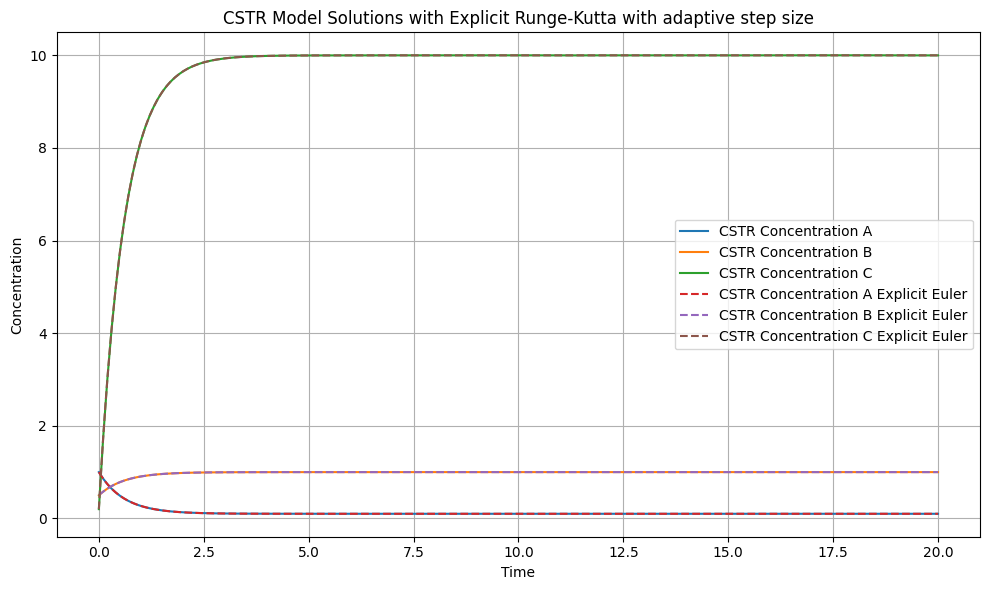

In [59]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = np.array([1.0, 0.5, 0.2])  # Initial conditions for CSTR model

#Solver parameters
N = 200
h0 = (t_span[1] - t_span[0]) / N

f, _ = CSTR_3state_model(params)

abs_tol = 1e-6
rel_tol = 1e-6

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_adaptive_t, solution_adaptive_x, solution_adaptive_h = ExplicitRungeKuttaSolverAdaptive(f, t_span, x0, h0, solver, abs_tol, rel_tol)

#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='CSTR Concentration A')
plt.plot(sol.t, sol.y[1], label='CSTR Concentration B') 
plt.plot(sol.t, sol.y[2], label='CSTR Concentration C')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,0], label='CSTR Concentration A Explicit Euler', linestyle='--')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,1], label='CSTR Concentration B Explicit Euler', linestyle='--')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,2], label='CSTR Concentration C Explicit Euler', linestyle='--')
plt.title('CSTR Model Solutions with Explicit Runge-Kutta with adaptive step size')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

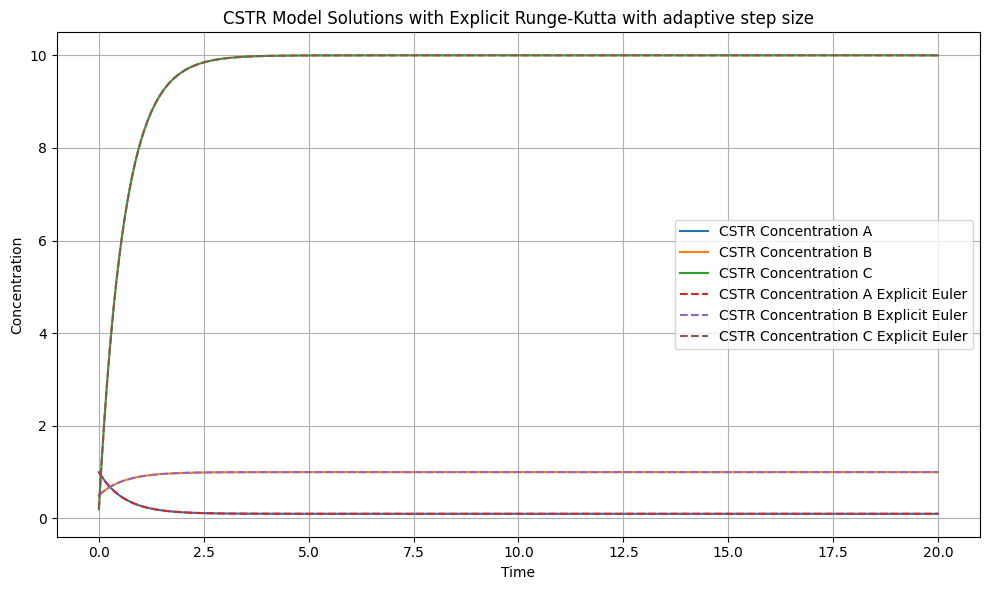

In [65]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = np.array([1.0, 0.5, 0.2])  # Initial conditions for CSTR model

#Solver parameters
N = 2000
h0 = (t_span[1] - t_span[0]) / N

f, _ = CSTR_3state_model(params)

abs_tol = 1e-6
rel_tol = 1e-6

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_adaptive_t, solution_adaptive_x, solution_adaptive_h = ExplicitRungeKuttaSolverAdaptive(f, t_span, x0, h0, solver, abs_tol, rel_tol)

#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='CSTR Concentration A')
plt.plot(sol.t, sol.y[1], label='CSTR Concentration B') 
plt.plot(sol.t, sol.y[2], label='CSTR Concentration C')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,0], label='CSTR Concentration A Explicit Euler', linestyle='--')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,1], label='CSTR Concentration B Explicit Euler', linestyle='--')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,2], label='CSTR Concentration C Explicit Euler', linestyle='--')
plt.title('CSTR Model Solutions with Explicit Runge-Kutta with adaptive step size')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

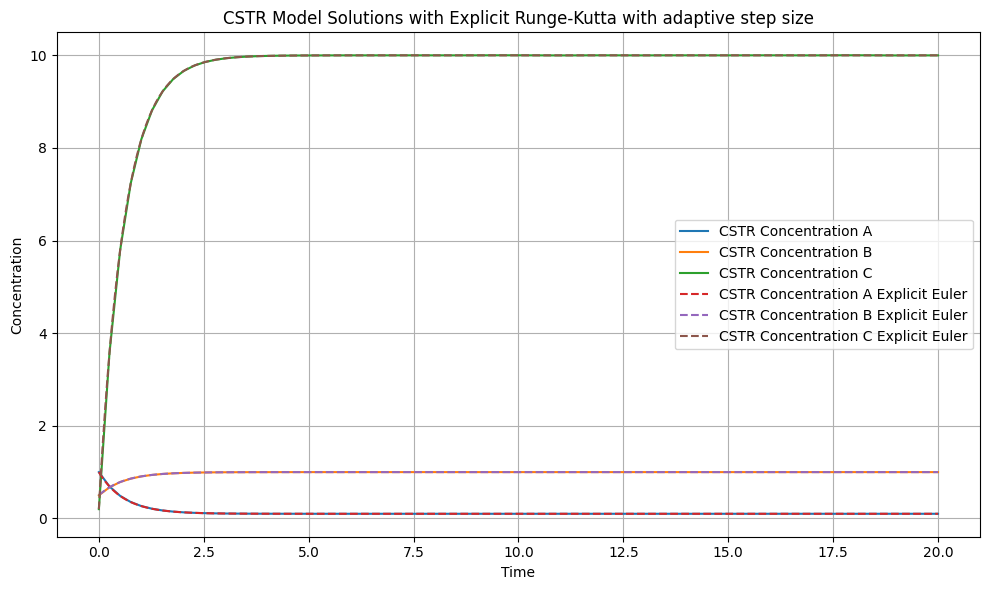

In [74]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = np.array([1.0, 0.5, 0.2])  # Initial conditions for CSTR model

#Solver parameters
N = 80
h0 = (t_span[1] - t_span[0]) / N

f, _ = CSTR_3state_model(params)

abs_tol = 1e-6
rel_tol = 1e-6

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_adaptive_t, solution_adaptive_x, solution_adaptive_h = ExplicitRungeKuttaSolverAdaptive(f, t_span, x0, h0, solver, abs_tol, rel_tol)

#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='CSTR Concentration A')
plt.plot(sol.t, sol.y[1], label='CSTR Concentration B') 
plt.plot(sol.t, sol.y[2], label='CSTR Concentration C')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,0], label='CSTR Concentration A Explicit Euler', linestyle='--')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,1], label='CSTR Concentration B Explicit Euler', linestyle='--')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,2], label='CSTR Concentration C Explicit Euler', linestyle='--')
plt.title('CSTR Model Solutions with Explicit Runge-Kutta with adaptive step size')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

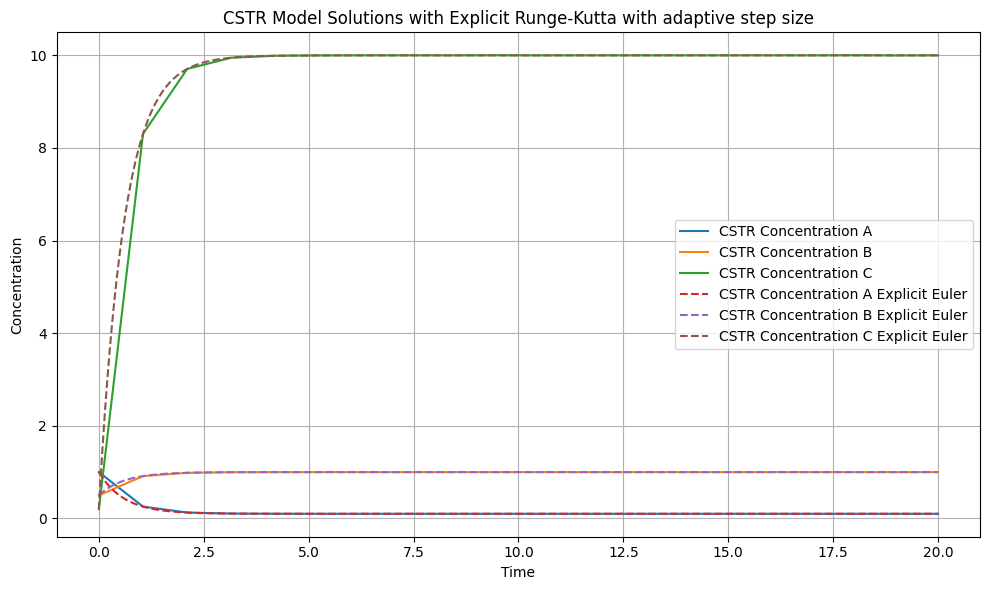

In [75]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = np.array([1.0, 0.5, 0.2])  # Initial conditions for CSTR model

#Solver parameters
N = 20
h0 = (t_span[1] - t_span[0]) / N

f, _ = CSTR_3state_model(params)

abs_tol = 1e-6
rel_tol = 1e-6

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_adaptive_t, solution_adaptive_x, solution_adaptive_h = ExplicitRungeKuttaSolverAdaptive(f, t_span, x0, h0, solver, abs_tol, rel_tol)

#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='CSTR Concentration A')
plt.plot(sol.t, sol.y[1], label='CSTR Concentration B') 
plt.plot(sol.t, sol.y[2], label='CSTR Concentration C')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,0], label='CSTR Concentration A Explicit Euler', linestyle='--')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,1], label='CSTR Concentration B Explicit Euler', linestyle='--')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,2], label='CSTR Concentration C Explicit Euler', linestyle='--')
plt.title('CSTR Model Solutions with Explicit Runge-Kutta with adaptive step size')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## CSTR 1 state model fixed time steps

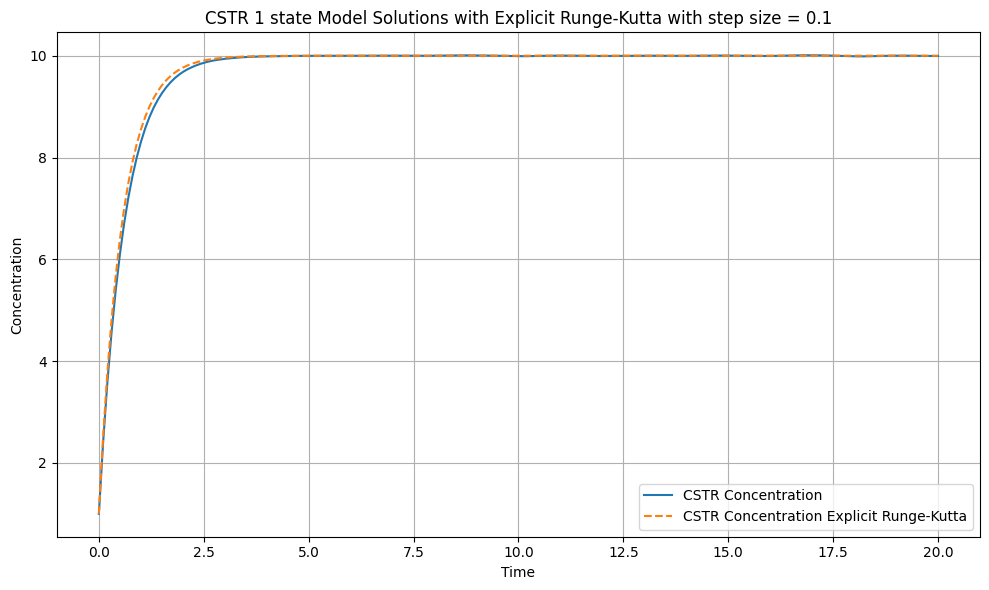

In [79]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = np.array([1.0])  # Initial conditions for CSTR model

#Solver parameters
N = 200
h = (t_span[1] - t_span[0]) / N

f, _ = CSTR_1state_model(params)

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_t, solution_fixed_x = ExplicitRungeKuttaSolver(f, t_span, x0, h, solver)

#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='CSTR Concentration')
plt.plot(solution_fixed_t, solution_fixed_x[:,0], label='CSTR Concentration Explicit Runge-Kutta', linestyle='--')
plt.title('CSTR 1 state Model Solutions with Explicit Runge-Kutta with step size = 0.1')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

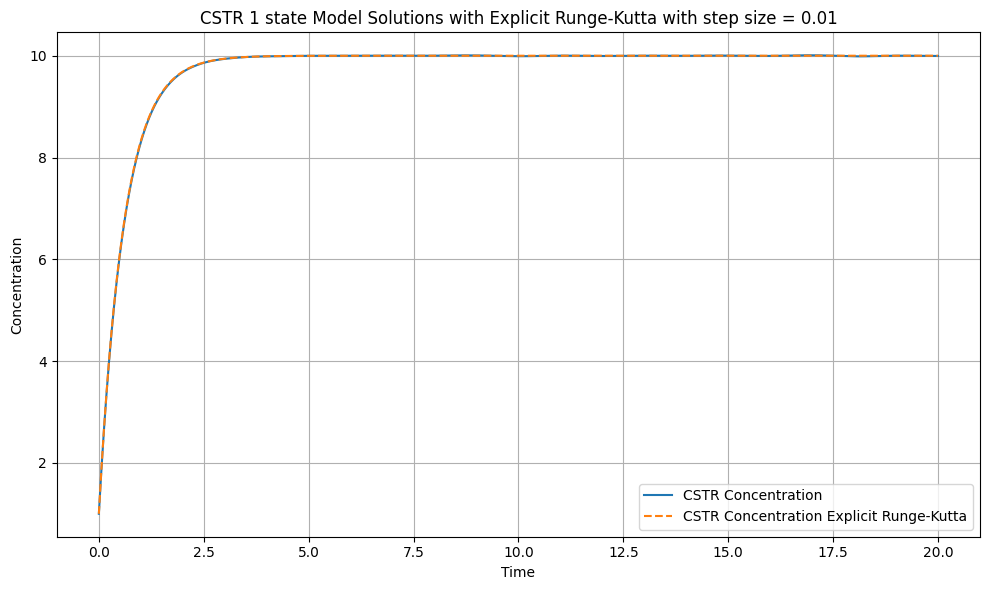

In [80]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = np.array([1.0])  # Initial conditions for CSTR model

#Solver parameters
N = 2000
h = (t_span[1] - t_span[0]) / N

f, _ = CSTR_1state_model(params)

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_t, solution_fixed_x = ExplicitRungeKuttaSolver(f, t_span, x0, h, solver)

#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='CSTR Concentration')
plt.plot(solution_fixed_t, solution_fixed_x[:,0], label='CSTR Concentration Explicit Runge-Kutta', linestyle='--')
plt.title('CSTR 1 state Model Solutions with Explicit Runge-Kutta with step size = 0.01')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

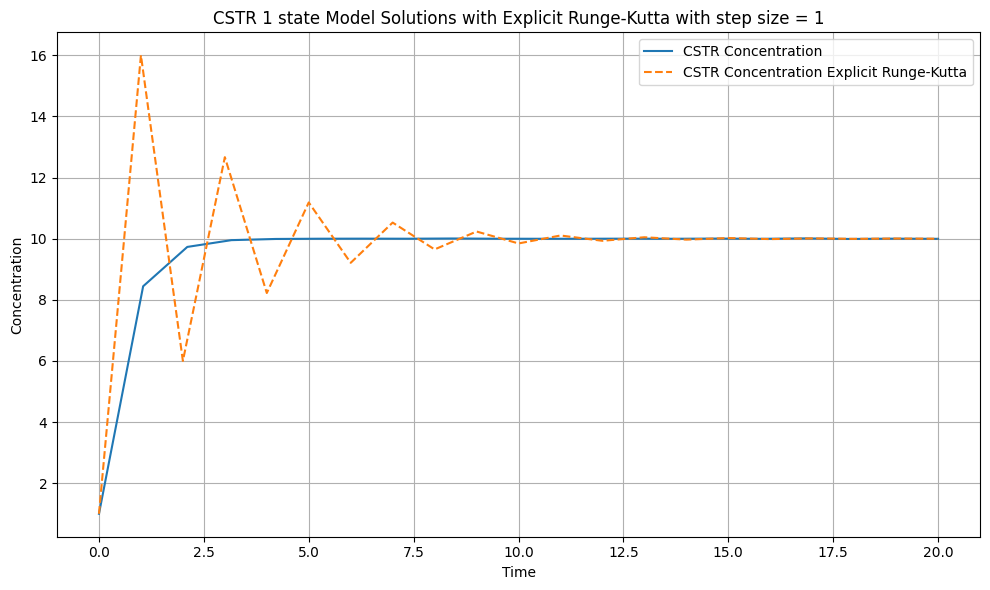

In [81]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = np.array([1.0])  # Initial conditions for CSTR model

#Solver parameters
N = 20
h = (t_span[1] - t_span[0]) / N

f, _ = CSTR_1state_model(params)

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_t, solution_fixed_x = ExplicitRungeKuttaSolver(f, t_span, x0, h, solver)

#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='CSTR Concentration')
plt.plot(solution_fixed_t, solution_fixed_x[:,0], label='CSTR Concentration Explicit Runge-Kutta', linestyle='--')
plt.title('CSTR 1 state Model Solutions with Explicit Runge-Kutta with step size = 1')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()